In [2]:
import torch

In [3]:
# 1.创建一个5行3列的随机张量X
X = torch.rand(5, 3)

In [4]:
# 2. 用pytorch内置函数检测X的shape，dtype，device
print(X.shape)
print(X.dtype)
print(X.device)

torch.Size([5, 3])
torch.float32
cpu


In [5]:
# 3. 直接创建一个[[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]]的张量Y
Y = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])

In [6]:
# 4. 用任意方法将Y的维度转变为5行3列
Y = Y.view(5, 3)

In [7]:
# 5. 实现X和Y的加减乘除，同时了解abs()，sqrt()，neg()，mean()的作用

# abs(): 返回输入张量的绝对值。
# sqrt(): 返回输入张量每个元素的平方根。
# neg(): 返回输入张量的每个元素的负值。
# mean(): 返回输入张量所有元素的平均值。
print(X + Y)
print(X - Y)
print(X * Y)
print(X / Y)
print(X.abs())
print(X.sqrt())
print(X.neg())
print(X.mean())

tensor([[ 1.8593,  2.5454,  3.2040],
        [ 4.6908,  5.8555,  6.1175],
        [ 7.9187,  8.6694,  9.6153],
        [10.0148, 11.4459, 12.5468],
        [13.1221, 14.1661, 15.1287]])
tensor([[ -0.1407,  -1.4546,  -2.7960],
        [ -3.3092,  -4.1445,  -5.8825],
        [ -6.0813,  -7.3306,  -8.3847],
        [ -9.9852, -10.5541, -11.4532],
        [-12.8779, -13.8339, -14.8713]])
tensor([[0.8593, 1.0909, 0.6119],
        [2.7631, 4.2773, 0.7050],
        [6.4306, 5.3555, 5.5379],
        [0.1476, 4.9045, 6.5613],
        [1.5873, 2.3249, 1.9304]])
tensor([[0.8593, 0.2727, 0.0680],
        [0.1727, 0.1711, 0.0196],
        [0.1312, 0.0837, 0.0684],
        [0.0015, 0.0405, 0.0456],
        [0.0094, 0.0119, 0.0086]])
tensor([[0.8593, 0.5454, 0.2040],
        [0.6908, 0.8555, 0.1175],
        [0.9187, 0.6694, 0.6153],
        [0.0148, 0.4459, 0.5468],
        [0.1221, 0.1661, 0.1287]])
tensor([[0.9270, 0.7385, 0.4516],
        [0.8311, 0.9249, 0.3428],
        [0.9585, 0.8182, 0.7844]

In [8]:
# 7. 将张量X转为Numpy格式，再将其转回来。
X = X.numpy()
X = torch.from_numpy(X)

In [9]:
# 8. 将张量X放到cuda上。
X = X.cuda()

Epoch 1, Loss: 10.6167, Accuracy: 84.64%
Epoch 2, Loss: 1.6402, Accuracy: 93.56%
Epoch 3, Loss: 1.0390, Accuracy: 95.35%
Epoch 4, Loss: 0.7130, Accuracy: 96.18%
Epoch 5, Loss: 0.5394, Accuracy: 96.73%
Epoch 6, Loss: 0.4213, Accuracy: 97.06%
Epoch 7, Loss: 0.3122, Accuracy: 97.51%
Epoch 8, Loss: 0.2369, Accuracy: 97.74%
Epoch 9, Loss: 0.1746, Accuracy: 98.14%
Epoch 10, Loss: 0.1775, Accuracy: 98.06%
Epoch 11, Loss: 0.1466, Accuracy: 98.19%
Epoch 12, Loss: 0.1067, Accuracy: 98.54%
Epoch 13, Loss: 0.1313, Accuracy: 98.34%
Epoch 14, Loss: 0.1104, Accuracy: 98.56%
Epoch 15, Loss: 0.0926, Accuracy: 98.58%
Epoch 16, Loss: 0.1011, Accuracy: 98.56%
Epoch 17, Loss: 0.1017, Accuracy: 98.64%
Epoch 18, Loss: 0.0864, Accuracy: 98.77%
Epoch 19, Loss: 0.0743, Accuracy: 98.93%
Epoch 20, Loss: 0.0888, Accuracy: 98.81%
Epoch 21, Loss: 0.0806, Accuracy: 98.93%
Epoch 22, Loss: 0.0633, Accuracy: 99.09%
Epoch 23, Loss: 0.0725, Accuracy: 99.04%
Epoch 24, Loss: 0.0520, Accuracy: 99.22%
Epoch 25, Loss: 0.0623, 

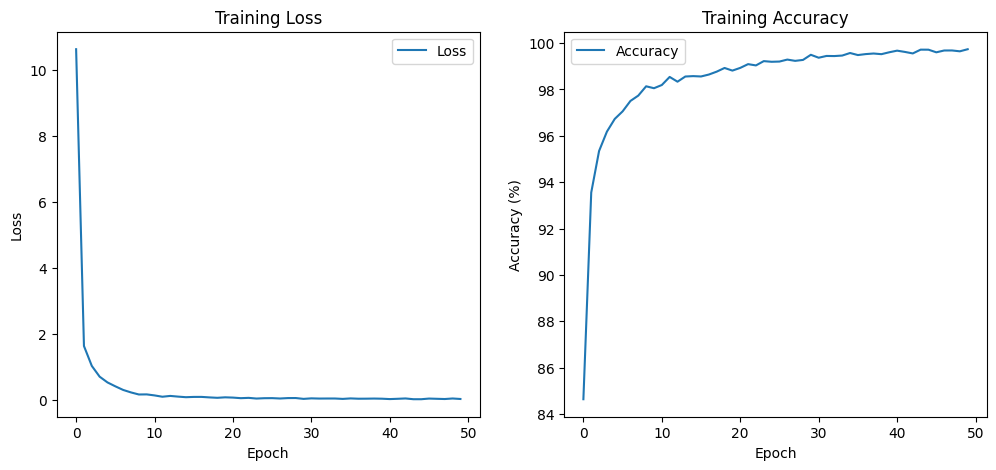

In [16]:
# 训练
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

# 步骤1: 加载并归一化MNIST数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

# 步骤2: 定义网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        # 步骤4: 对全连接层进行正态分布权重初始化
        nn.init.normal_(self.fc1.weight)
        nn.init.normal_(self.fc2.weight)
        nn.init.normal_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# 步骤5: 训练模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

epochs = 50
loss_values = []  # 存储每个epoch的平均损失值
accuracy_values = []  # 存储每个epoch的准确率

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = 100 * correct / total
    loss_values.append(avg_loss)
    accuracy_values.append(accuracy)

    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

# 绘制损失和准确率图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

Fold 0, LR: 0.001, Batch Size: 64, Optimizer: Adam
Epoch 1, Accuracy: 0.9153
Epoch 2, Accuracy: 0.9457
Epoch 3, Accuracy: 0.9582
Epoch 4, Accuracy: 0.9576
Epoch 5, Accuracy: 0.9527
Epoch 6, Accuracy: 0.9643
Epoch 7, Accuracy: 0.9618
Epoch 8, Accuracy: 0.9699
Epoch 9, Accuracy: 0.9680
Epoch 10, Accuracy: 0.9651
Fold 1, LR: 0.001, Batch Size: 64, Optimizer: Adam
Epoch 1, Accuracy: 0.9085
Epoch 2, Accuracy: 0.9432
Epoch 3, Accuracy: 0.9472
Epoch 4, Accuracy: 0.9504
Epoch 5, Accuracy: 0.9612
Epoch 6, Accuracy: 0.9554
Epoch 7, Accuracy: 0.9672
Epoch 8, Accuracy: 0.9634
Epoch 9, Accuracy: 0.9614
Epoch 10, Accuracy: 0.9688
Fold 2, LR: 0.001, Batch Size: 64, Optimizer: Adam
Epoch 1, Accuracy: 0.6667
Epoch 2, Accuracy: 0.7923
Epoch 3, Accuracy: 0.8716
Epoch 4, Accuracy: 0.8968
Epoch 5, Accuracy: 0.9135
Epoch 6, Accuracy: 0.9137
Epoch 7, Accuracy: 0.8990
Epoch 8, Accuracy: 0.9380
Epoch 9, Accuracy: 0.9420
Epoch 10, Accuracy: 0.9383
Fold 3, LR: 0.001, Batch Size: 64, Optimizer: Adam
Epoch 1, Accu

KeyError: 'Loss'

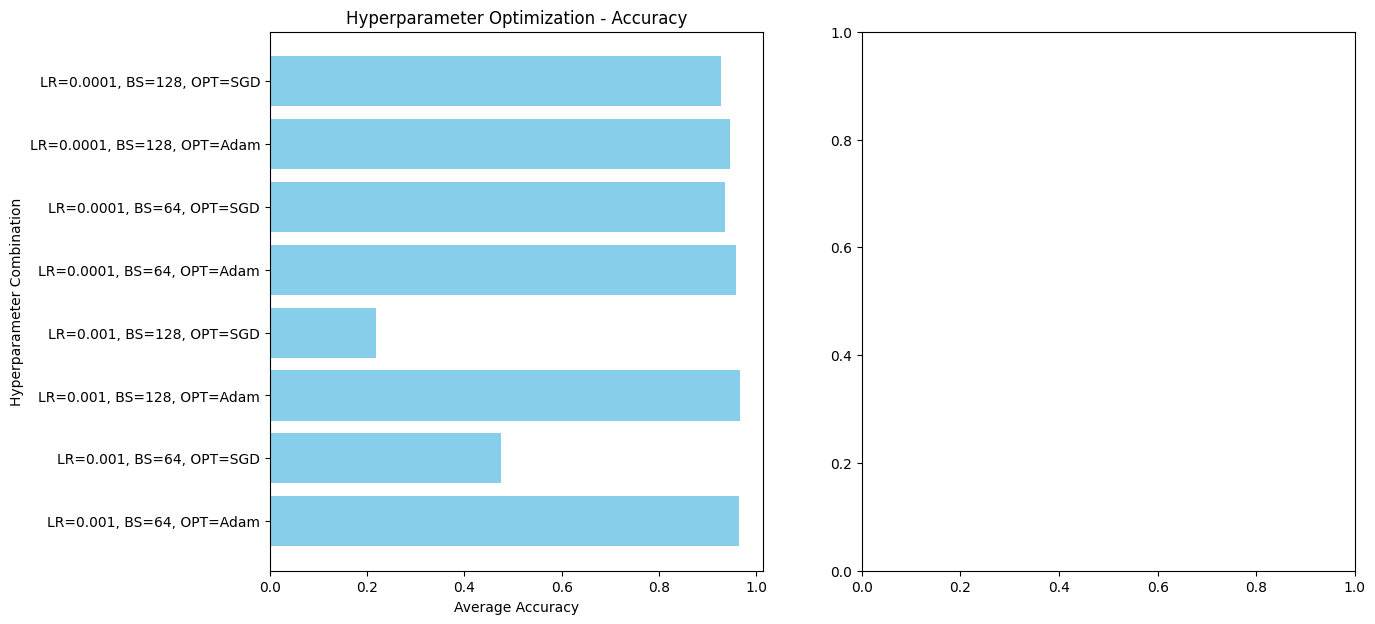

In [18]:
# K折交叉验证法

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# 使用相同的模型定义
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        nn.init.normal_(self.fc1.weight)
        nn.init.normal_(self.fc2.weight)
        nn.init.normal_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# 准备MNIST数据集
def get_mnist_dataloaders(batch_size=100):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return dataset

# 定义训练和评估函数
def train_and_evaluate(model, train_loader, val_loader, optimizer, epochs, device):
    loss_function = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = loss_function(output, target)
            loss.backward()
            optimizer.step()
        
        # 评估模式
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        
        accuracy = correct / total
        print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}')
    return accuracy

# 超参数搜索空间
hyperparams = {
    'learning_rate': [0.001, 0.0001],
    'batch_size': [64, 128],
    'optimizer': ['Adam', 'SGD'],
}

# K折交叉验证
k_folds = 6
num_epochs = 10
results = []

# 设备配置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = get_mnist_dataloaders()

# K折分割
kf = KFold(n_splits=k_folds, shuffle=True)

# 开始网格搜索
for lr in hyperparams['learning_rate']:
    for batch_size in hyperparams['batch_size']:
        for opt in hyperparams['optimizer']:
            fold_performance = []

            for fold, (train_ids, test_ids) in enumerate(kf.split(dataset)):
                print(f'Fold {fold}, LR: {lr}, Batch Size: {batch_size}, Optimizer: {opt}')
                
                # 分割数据集
                train_subsampler = SubsetRandomSampler(train_ids)
                val_subsampler = SubsetRandomSampler(test_ids)
                
                train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_subsampler)
                val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_subsampler)
                
                # 初始化模型和优化器
                model = Net().to(device)
                if opt == 'Adam':
                    optimizer = optim.Adam(model.parameters(), lr=lr)
                elif opt == 'SGD':
                    optimizer = optim.SGD(model.parameters(), lr=lr)
                
                # 训练和评估
                accuracy = train_and_evaluate(model, train_loader, val_loader, optimizer, num_epochs, device)
                fold_performance.append(accuracy)
            
            # 计算此超参数组合的平均性能
            avg_performance = sum(fold_performance) / len(fold_performance)
            results.append({'LR': lr, 'Batch Size': batch_size, 'Optimizer': opt, 'Accuracy': avg_performance})
            print(f'Average Performance: {avg_performance}')

# 可视化结果
results_df = pd.DataFrame(results)
print(results_df)


import matplotlib.pyplot as plt

# 准确率条形图
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
results_df.sort_values('Accuracy', ascending=True, inplace=True)
plt.barh(results_df.index, results_df['Accuracy'], color='skyblue')
plt.xlabel('Average Accuracy')
plt.ylabel('Hyperparameter Combination')
plt.yticks(results_df.index, labels=results_df.apply(lambda row: f"LR={row['LR']}, BS={row['Batch Size']}, OPT={row['Optimizer']}", axis=1))
plt.title('Hyperparameter Optimization - Accuracy')

# 损失条形图
plt.subplot(1, 2, 2)
results_df.sort_values('Loss', ascending=True, inplace=True)
plt.barh(results_df.index, results_df['Loss'], color='salmon')
plt.xlabel('Average Loss')
plt.ylabel('Hyperparameter Combination')
plt.yticks(results_df.index, labels=results_df.apply(lambda row: f"LR={row['LR']}, BS={row['Batch Size']}, OPT={row['Optimizer']}", axis=1))
plt.title('Hyperparameter Optimization - Loss')

plt.tight_layout()
plt.show()
